In [4]:
%% Laboration 5
%% 1.)
C = 1/5;

lower = 0;
upper = 20;
n = [100,500,1000];

x = linspace(lower,upper,100);
y = C*exp(-2.*x) + (1/5)*(2*sin(x) - cos(x));

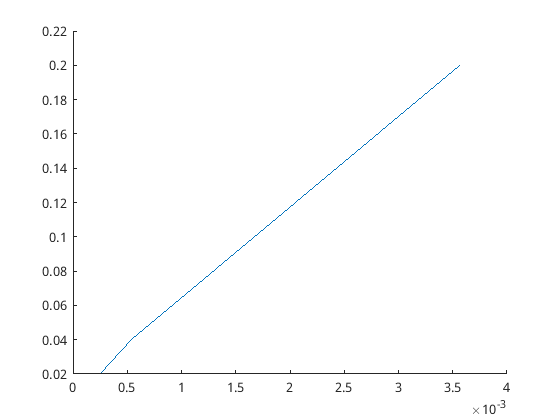

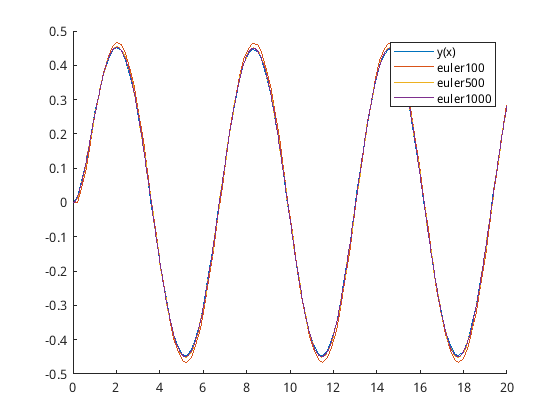

In [5]:
error = zeros(1,length(n));
figure(1), clf(1), hold on
plot(x,y)
k = 0;
for i = n
    k = k + 1;
    [euler,x] = euleralg(i,lower,upper);
    plot(x,euler);
    error(k) = abs(y(end) - euler(end));
end

legend('y(x)','euler100','euler500','euler1000');
hold off

figure(2), clf(2), hold on
loglog(error,(upper-lower)./n)
hold off

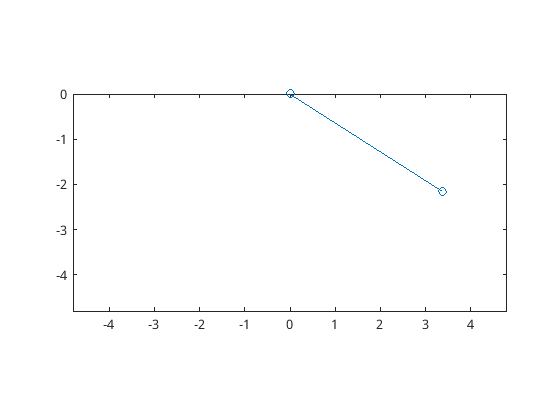

In [8]:
%%
%
L = 4;
T = (17/6)*pi;
u1_0 = pi/3;
u2_0 = 0;
u = [u1_0,u2_0];

[t,y] = rk4(u,T,100);
fi = y(:,1);

anim(t,fi,L)

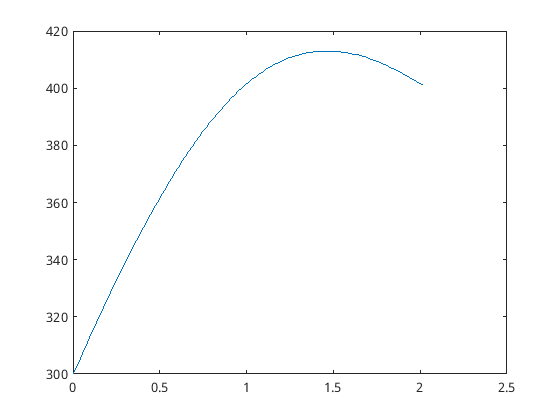

In [13]:
%% 
% 3.) Randvardesproblem
L = 2;
A = 0.01;
k = 2.5;
T0 = 300;
TL = 400;

n = 100;
h = L/(n);
x = linspace(0,L,n)';
Q = 300*exp(-(x-L/2).^2);



e = (1/h^2)*ones(n,1);
a = spdiags([-e 2*e -e],-1:1,n,n);
b = zeros(n,1);
b(1) = 1; b(n) = 3;
A = full(a);
b = (1/k)*Q;
b(1) = b(1) + 300*(1/h^2);
b(end) = b(end) + 400*(1/h^2);
T = A\b;
xplot = [x;x(end)+h];
T_plot = [300;T];

plot(xplot,T_plot)

In [23]:
%%
% 4.) Icke linjart ekvationssystem - flera variabler
format long
clear, clc
a = 2;
L1 = 1;     L2 = 1;     L3 = 1;
m1 = 1;     m2 = 3;

%guesses
u1=1; 
u2=0.1;
u3=0.1; 
iter= 0;
xp =[u1;u2;u3];
x = zeros(size(xp));
%tol
tol = 1e-14;
while norm(xp - x) > tol
    iter= iter + 1;
    x = xp;
    % new values for u1, u2, and u3
    u1 = x(1);
    u2 = x(2);
    u3 = x(3);
    %f1,f2 and f3.
    f1 = L1*cos(u1) + L2*cos(u2) + L3*cos(u3) - a;
    f2 =  L1*sin(u1) + L2*sin(u2) + L3*sin(u3); 
    f3 = m2*tan(u1) - (m1 + m2)*tan(u2) + m1*tan(u3);
    %Partial derivatives in terms of u1,u2 and u3.
    df1u1 = -L1*sin(u1);
    df1u2 = -L2*sin(u2);
    df1u3 = -L3*sin(u3);
    df2u1 = L1*cos(u1);
    df2u2 = L2*cos(u2);
    df2u3 = L3*cos(u3);
    df3u1 = m2*(sec(u1))^2;
    df3u2 = -(m1 + m2)*(sec(u1))^2;
    df3u3 = m1*(sec(u1))^2;
    % Jacobian
    J = [df1u1 df1u2 df1u3; df2u1 df2u2 df2u3; df3u1 df3u2 df3u3];    
    % The Newton-Raphson stuff
    xp = x - J\[f1;f2;f3];
    disp(sprintf('iteration=%2.0f,  u1=%6.15f,  u2=%6.15f, u3=%6.15f', iter,xp)); 
end

iteration= 1,  u1=1.806306575137289,  u2=0.542158568918018, u3=-1.826360516426676
iteration= 2,  u1=0.882353200147442,  u2=-0.213526210582378, u3=-1.473745203581569
iteration= 3,  u1=1.436053055607530,  u2=-0.199653145426463, u3=-0.755241170006811
iteration= 4,  u1=1.241150508307230,  u2=-0.255567819197812, u3=-0.791164255385422
iteration= 5,  u1=1.169576127402624,  u2=-0.113104634420788, u3=-0.928937087944945
iteration= 6,  u1=1.053222257297564,  u2=0.003405363045196, u3=-1.057655630684173
iteration= 7,  u1=0.938934588217847,  u2=0.106432081093361, u3=-1.154820977231817
iteration= 8,  u1=0.869459136365297,  u2=0.166489142835938, u3=-1.197187544966664
iteration= 9,  u1=0.849995938210048,  u2=0.183887040254601, u3=-1.206184648940309
iteration=10,  u1=0.846889815995566,  u2=0.186701359658029, u3=-1.207824494817059
iteration=11,  u1=0.846580180865644,  u2=0.186979966158364, u3=-1.208009244567059
iteration=12,  u1=0.846559377187029,  u2=0.186998669081150, u3=-1.208022111746979
iteration=13

In [24]:
% Test solution
calc_a = L1*cos(u1) + L2*cos(u2) + L3*cos(u3);
calc_zero = L1*sin(u1) + L2*sin(u2) + L3*sin(u3);
calc_zero2 = m2*tan(u1) - (m1 + m2)*tan(u2) + m1*tan(u3);

In [25]:
disp(calc_a)
disp(calc_zero)
disp(calc_zero2)

     2

     0

     4.130029651605582e-14

